<a href="https://colab.research.google.com/github/1nf1n1tee/CSE_422_Artificial_Intelligence/blob/main/CSE_422_Project_MainFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1) Dataset source - Kaggle
Link - https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification


We will predict whether the asteroid is Hazardous for earth or not.

# 2)Importing Libraries & Reading CSV

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [449]:
file_link = 'https://drive.google.com/file/d/1TOG2vmspwW4X8kNrbs6LurUO9g8t5uOB/view?usp=drive_link'

id = file_link.split("/")[-2]

new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080.0,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3759644.0,3759644,24.5,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.970984,1269.433055,0.805894,284.183028,3.782960,2457601.137,12.297467,0.283591,J2000,False
2,2446862.0,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,2446862.0,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
4,3759644.0,3759644,24.5,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.970984,1269.433055,0.805894,284.183028,3.782960,2457601.137,12.297467,0.283591,J2000,False


# 3)Dataset Preprocessing

In [450]:
df.shape

(4689, 40)

In [452]:
df.nunique()

,0
Neo Reference ID,3659
Name,3659
Absolute Magnitude,268
Est Dia in KM(min),268
Est Dia in KM(max),268
Est Dia in M(min),268
Est Dia in M(max),268
Est Dia in Miles(min),267
Est Dia in Miles(max),268
Est Dia in Feet(min),268


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4688 non-null   float64
 1   Name                          4689 non-null   int64  
 2   Absolute Magnitude            4688 non-null   float64
 3   Est Dia in KM(min)            4682 non-null   float64
 4   Est Dia in KM(max)            4680 non-null   float64
 5   Est Dia in M(min)             4681 non-null   float64
 6   Est Dia in M(max)             4680 non-null   float64
 7   Est Dia in Miles(min)         4681 non-null   float64
 8   Est Dia in Miles(max)         4678 non-null   float64
 9   Est Dia in Feet(min)          4679 non-null   float64
 10  Est Dia in Feet(max)          4683 non-null   float64
 11  Close Approach Date           4683 non-null   object 
 12  Epoch Date Close Approach     4685 non-null   float64
 13  Rel

In [454]:
df.isnull().sum()

,0
Neo Reference ID,1
Name,0
Absolute Magnitude,1
Est Dia in KM(min),7
Est Dia in KM(max),9
Est Dia in M(min),8
Est Dia in M(max),9
Est Dia in Miles(min),8
Est Dia in Miles(max),11
Est Dia in Feet(min),10


## 3.a)Null Values

In [455]:
for i in df:
  if df[i].isnull().sum() > 0:
    if pd.api.types.is_numeric_dtype(df[i]):
      df[i].fillna(df[i].max(), inplace=True)
    else:
      df[i].fillna(df[i].mode()[0], inplace=True)

In [456]:
df.isnull().sum()

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0
Est Dia in M(min),0
Est Dia in M(max),0
Est Dia in Miles(min),0
Est Dia in Miles(max),0
Est Dia in Feet(min),0


In [457]:
df.shape

(4689, 40)

## 3.b)Duplicate values

In [458]:
df.drop_duplicates(inplace=True)
df.shape

(4633, 40)

In [459]:
cat_cols=df.select_dtypes(include=['object','bool']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox', 'Hazardous']
Numerical Variables:
['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']


In [460]:
df['Hazardous'] = df['Hazardous'].astype(int)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080.0,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,1
1,3759644.0,3759644,24.5,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.970984,1269.433055,0.805894,284.183028,3.782960,2457601.137,12.297467,0.283591,J2000,0
2,2446862.0,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,1
4,3759644.0,3759644,24.5,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.970984,1269.433055,0.805894,284.183028,3.782960,2457601.137,12.297467,0.283591,J2000,0
5,3092506.0,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,0


## 3.c)Normalizing

In [464]:
# Normalizing Values
for i in df:
    if df[i].nunique() > 3500:
        step_size = (df[i].max() - df[i].min()) / 250
        df[i] = (df[i] - df[i].min()) // step_size

#4) Dataset Spliting

In [465]:
x= df.drop(['Neo Reference ID','Name', 'Orbit ID', 'Close Approach Date','Epoch Date Close Approach','Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Orbit Determination Date','Orbiting Body', 'Equinox','Hazardous'],axis=1, inplace = False)
y= df['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x.shape

(4633, 25)

In [484]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4633 entries, 0 to 4688
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4633 non-null   float64
 1   Est Dia in KM(min)            4633 non-null   float64
 2   Est Dia in KM(max)            4633 non-null   float64
 3   Relative Velocity km per sec  4633 non-null   float64
 4   Relative Velocity km per hr   4633 non-null   float64
 5   Miles per hour                4633 non-null   float64
 6   Miss Dist.(Astronomical)      4633 non-null   float64
 7   Miss Dist.(lunar)             4633 non-null   float64
 8   Miss Dist.(kilometers)        4633 non-null   float64
 9   Miss Dist.(miles)             4633 non-null   float64
 10  Orbit Uncertainity            4633 non-null   int64  
 11  Minimum Orbit Intersection    4633 non-null   float64
 12  Jupiter Tisserand Invariant   4633 non-null   float64
 13  Epoch Os

# 5)Correlation Matrix

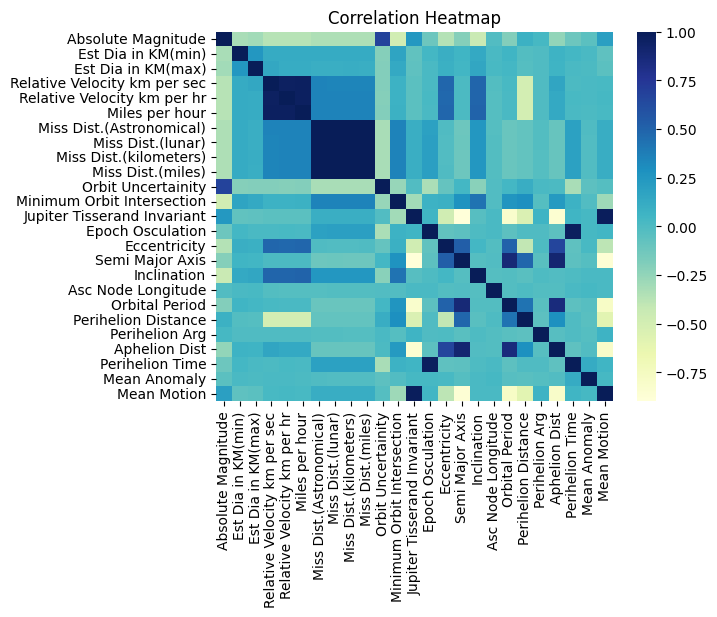

In [468]:
# Correlation heatmap
sns.heatmap(x.corr(), cmap= 'YlGnBu')

plt.title("Correlation Heatmap")
plt.show()

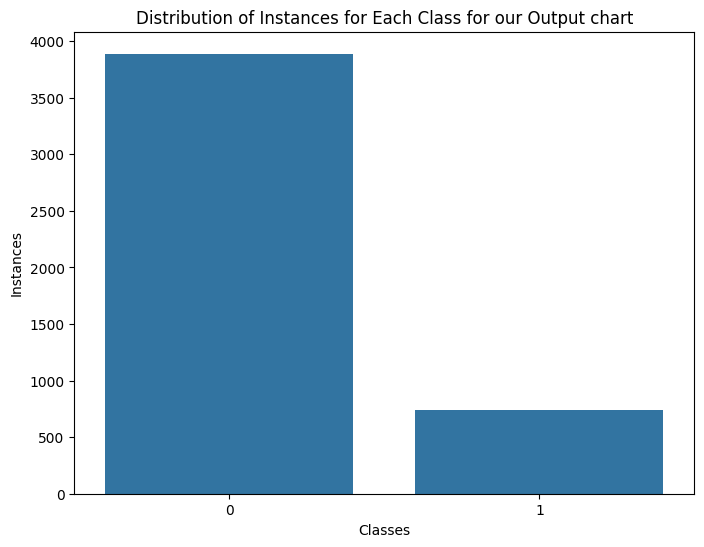

In [469]:
#Bar chart
class_counts = df['Hazardous'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Instances for Each Class for our Output chart')
plt.xlabel('Classes')
plt.ylabel('Instances')
plt.show()

# 6)Model Training

### 6.a)KNN

In [470]:
# prompt: Now Write a Knn classifier to classify hazardous as arget column and show accuracy

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15) # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy}")



Accuracy of KNN classifier: 0.8784172661870504


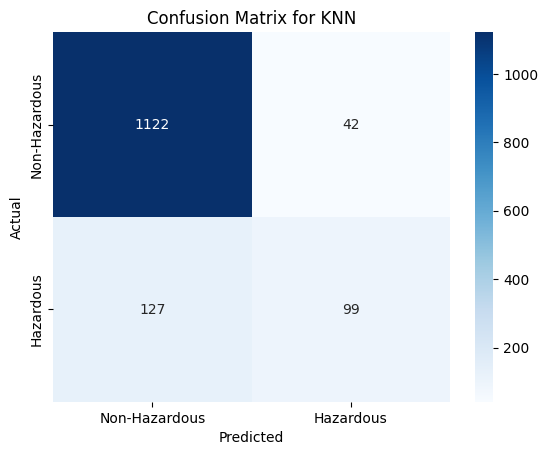

In [471]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


knn_cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [472]:
precision = precision_score(y_test, y_pred)
print(f"Precision of KNN: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall of KNN: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score of KNN: {f1}")

Precision of KNN: 0.7021276595744681
Recall of KNN: 0.43805309734513276
F1-score of KNN: 0.5395095367847411


### 6.b)Decision Tree

In [473]:
dt = DecisionTreeClassifier(random_state=42,max_depth=6)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree classifier: {accuracy_dt}")

Accuracy of Decision Tree classifier: 0.9906474820143885


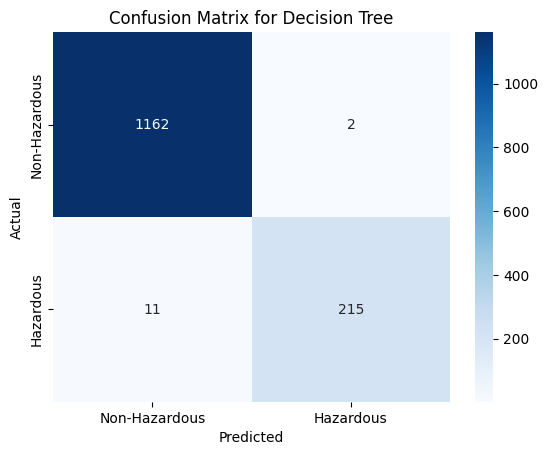

In [474]:
dt_cm = confusion_matrix(y_test, y_pred_dt)

plt.figure()
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [475]:
precision = precision_score(y_test, y_pred_dt)
print(f"Precision of Decision Tree: {precision}")
recall = recall_score(y_test, y_pred_dt)
print(f"Recall of Decision Tree: {recall}")
f1 = f1_score(y_test, y_pred_dt)
print(f"F1-score of Decision Tree: {f1}")

Precision of Decision Tree: 0.9907834101382489
Recall of Decision Tree: 0.9513274336283186
F1-score of Decision Tree: 0.9706546275395034


### 6.c)Random Forest

In [476]:
rf = RandomForestClassifier(random_state=42, n_estimators=3)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest classifier: {accuracy_rf}")

Accuracy of Random Forest classifier: 0.983453237410072


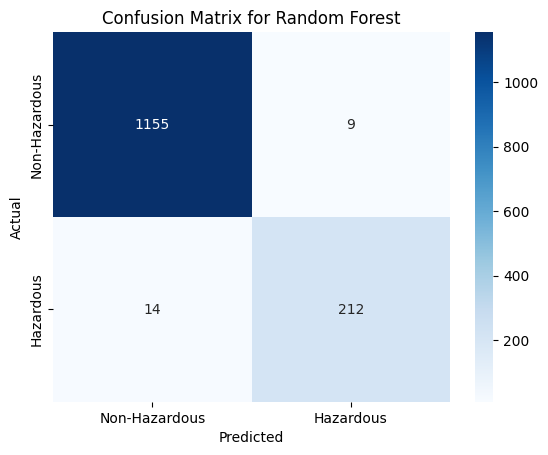

In [477]:
rf_cm = confusion_matrix(y_test, y_pred_rf)

plt.figure()
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [478]:
y_pred_rf= rf.predict(X_test)
precision = precision_score(y_test, y_pred_rf)
print(f"Precision of Random Forest: {precision}")
recall = recall_score(y_test, y_pred_rf)
print(f"Recall of Random Forest: {recall}")
f1 = f1_score(y_test, y_pred_rf)
print(f"F1-score of Random Forest: {f1}")

Precision of Random Forest: 0.9592760180995475
Recall of Random Forest: 0.9380530973451328
F1-score of Random Forest: 0.9485458612975392


### 6.d)Logistic regression


In [479]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression classifier: {accuracy_logreg}")

Accuracy of Logistic Regression classifier: 0.9467625899280575


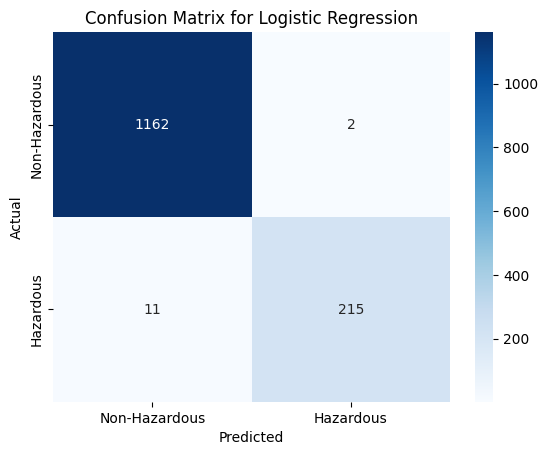

In [480]:
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure()
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [481]:
precision = precision_score(y_test, y_pred_logreg)
print(f"Precision of Logistic Regression: {precision}")
recall = recall_score(y_test, y_pred_logreg)
print(f"Recall of Logistic Regression: {recall}")
f1 = f1_score(y_test, y_pred_logreg)
print(f"F1-score of Logistic Regression: {f1}")

Precision of Logistic Regression: 0.8689320388349514
Recall of Logistic Regression: 0.7920353982300885
F1-score of Logistic Regression: 0.8287037037037037


# 7)Comparison

## 7.a)Histogram

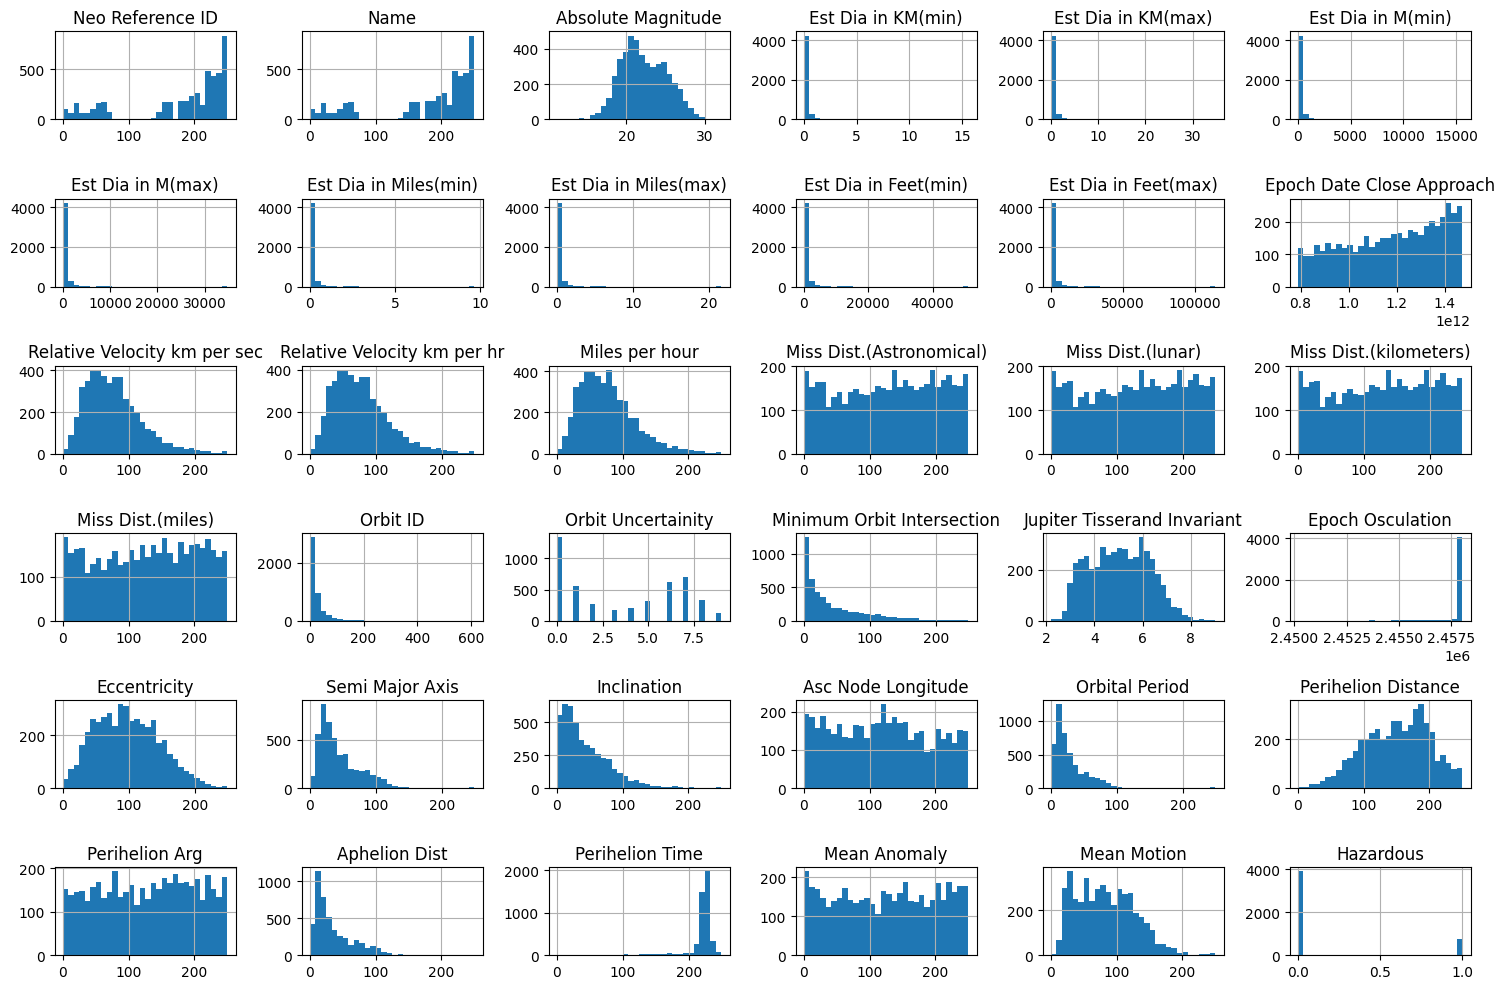

In [482]:
df.hist(bins=30, figsize=(15, 10), layout=(6, 6))

plt.tight_layout()
plt.show()

## 7.b)Vertical Bar-chart

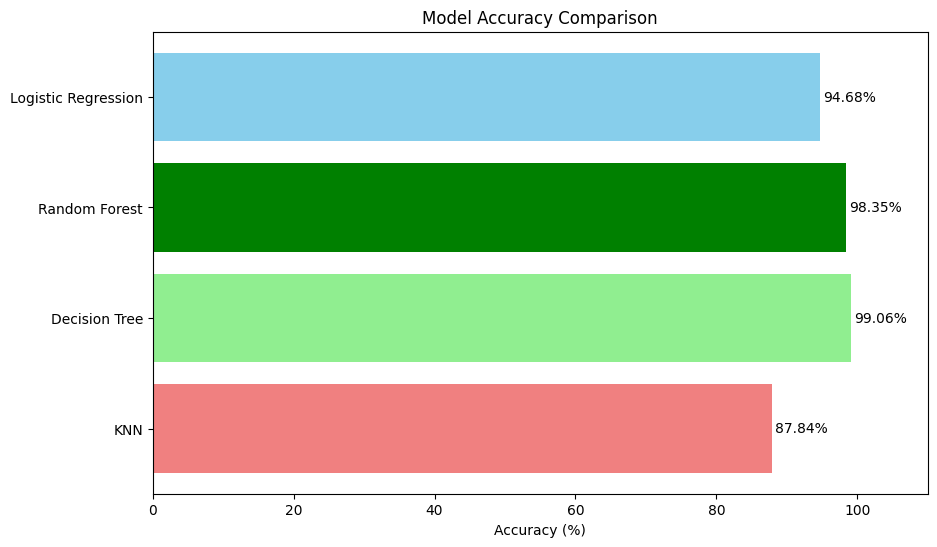

In [483]:
accuracy_percentages = {
    'KNN': accuracy_knn * 100,
    'Decision Tree': accuracy_dt * 100,
    'Random Forest': accuracy_rf * 100,
    'Logistic Regression': accuracy_logreg * 100,
    }


models = list(accuracy_percentages.keys())
accuracy_values = list(accuracy_percentages.values())

colors = ['lightcoral','lightgreen', 'green', 'skyblue']

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_values, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 110)

for index, value in enumerate(accuracy_values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()